In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split

from ipywidgets import *
from IPython.display import display

import warnings



In [3]:
df_train = pd.read_csv('./datasets/df_train.csv')
df_test = pd.read_csv('./datasets/df_test.csv')

In [4]:
df_train.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage

In [5]:
df_train = df_train.dropna(how='any',axis=1)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              878 non-null    int64  
 1   ms_subclass      878 non-null    int64  
 2   ms_zoning        878 non-null    object 
 3   lot_frontage     718 non-null    float64
 4   lot_area         878 non-null    int64  
 5   street           878 non-null    object 
 6   alley            58 non-null     object 
 7   lot_shape        878 non-null    object 
 8   land_contour     878 non-null    object 
 9   utilities        878 non-null    object 
 10  lot_config       878 non-null    object 
 11  land_slope       878 non-null    object 
 12  neighborhood     878 non-null    object 
 13  condition_1      878 non-null    object 
 14  condition_2      878 non-null    object 
 15  bldg_type        878 non-null    object 
 16  house_style      878 non-null    object 
 17  overall_qual    

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pid              2051 non-null   int64 
 1   ms_subclass      2051 non-null   int64 
 2   ms_zoning        2051 non-null   object
 3   lot_area         2051 non-null   int64 
 4   street           2051 non-null   object
 5   lot_shape        2051 non-null   object
 6   land_contour     2051 non-null   object
 7   utilities        2051 non-null   object
 8   lot_config       2051 non-null   object
 9   land_slope       2051 non-null   object
 10  neighborhood     2051 non-null   object
 11  condition_1      2051 non-null   object
 12  condition_2      2051 non-null   object
 13  bldg_type        2051 non-null   object
 14  house_style      2051 non-null   object
 15  overall_qual     2051 non-null   int64 
 16  overall_cond     2051 non-null   int64 
 17  year_built       2051 non-null   

In [8]:
X = df_train.drop(columns='saleprice')
y = df_train['saleprice']

In [9]:
X_train,X_val,y_train,y_val = train_test_split(X, y, random_state = 42)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 532 to 860
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pid              1538 non-null   int64 
 1   ms_subclass      1538 non-null   int64 
 2   ms_zoning        1538 non-null   object
 3   lot_area         1538 non-null   int64 
 4   street           1538 non-null   object
 5   lot_shape        1538 non-null   object
 6   land_contour     1538 non-null   object
 7   utilities        1538 non-null   object
 8   lot_config       1538 non-null   object
 9   land_slope       1538 non-null   object
 10  neighborhood     1538 non-null   object
 11  condition_1      1538 non-null   object
 12  condition_2      1538 non-null   object
 13  bldg_type        1538 non-null   object
 14  house_style      1538 non-null   object
 15  overall_qual     1538 non-null   int64 
 16  overall_cond     1538 non-null   int64 
 17  year_built       1538 non-null  

#  OneHot Encoding and Scaling

In [61]:
ctx = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(
        drop='first',
        sparse=False,
        handle_unknown='ignore'),
     ['ms_subclass','ms_zoning','lot_config','neighborhood','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd',
      'heating','foundation','sale_type']),
    ('ord',OrdinalEncoder(
        categories = [[]]),
     [])
],remainder='passthrough')

In [62]:
pipe = Pipeline(
    steps = [
        ('ctx',ctx),
        ('ss',StandardScaler())
    ]
)

In [63]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ctx',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['ms_subclass', 'ms_zoning',
                                                   'lot_config', 'neighborhood',
                                                   'house_style', 'roof_style',
                                                   'roof_matl', 'exterior_1st',
                                                   'exterior_2nd', 'heating',
                                                   'foundation',
                                                   'sale_type'])])),
                ('ss', StandardScaler())])

In [64]:
X_train_sc = pipe.transform(X_train)
X_val_sc = pipe.transform(X_val)
X_test_sc = pipe.transform(df_test)

C:\Users\Ari\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Ari\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1, 6, 7, 8, 9, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [65]:
X_train_sc = pd.DataFrame(data = X_train_sc, columns = pipe.get_feature_names_out())
X_val_sc = pd.DataFrame(data = X_val_sc, columns = pipe.get_feature_names_out())
X_test_sc = pd.DataFrame(data = X_test_sc, columns = pipe.get_feature_names_out())

In [66]:
X_train_sc.shape,X_val_sc.shape,X_test_sc.shape

((1538, 171), (513, 171), (878, 171))

# Reducing Multicollinearity

In [38]:
max_x = ('feat',10)
while max_x[1] > 5:
    x = [(X_train_sc.columns[col],variance_inflation_factor(X_train_sc,col)) for col in range(len(X_train_sc.columns))]
    max_x = max(x,key=lambda x: x[1])
    print(max_x)
    X_train_sc.drop(columns = max_x[0],inplace=True)

C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


('remainder__1st_flr_sf', inf)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__ms_zoning_5', 431.28178550816045)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_2nd_VinylSd', 128.70710204792798)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('remainder__pid_1', 95.97690351409678)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__roof_style_Gable', 79.30997552216222)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_1st_MetalSd', 52.80593117582659)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_2nd_CmentBd', 40.794403179528494)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__house_style_5', 39.75271238721817)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__roof_matl_CompShg', 30.85910870238104)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__neighborhood_NAmes', 19.056542959008944)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_1st_HdBoard', 18.945872840682497)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__house_style_3', 18.69891630028696)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__ms_subclass_50', 15.734990315845845)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_1st_VinylSd', 14.935412700662328)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('remainder__year_built', 12.013439029367689)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('remainder__2nd_flr_sf', 10.615590684479363)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('remainder__gr_liv_area', 8.206057201270896)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_2nd_Wd Sdng', 7.601809010370025)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__foundation_PConc', 6.816560721592221)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__exterior_2nd_Brk Cmn', 6.54793772296518)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__neighborhood_Somerst', 6.423047562410896)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('remainder__pid_2', 5.515570415240161)


C:\Users\Ari\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ohe__house_style_1', 4.866102499375697)


In [41]:
X_val_sc = X_val_sc[[col for col in X_train_sc.columns]]

In [42]:
X_test_sc = X_test_sc[[col for col in X_train_sc.columns]]

In [43]:
X_train_sc.shape,X_val_sc.shape,X_test_sc.shape

((1538, 147), (513, 147), (878, 147))

In [69]:
X_train_sc.corrwith(y_train).sort_values(key=abs,ascending=False).tail(50)

remainder__pid_1            -7.513025e-03
remainder__pid              -7.334055e-03
ohe__foundation_PConc       -7.051605e-03
ohe__ms_zoning_6            -7.035651e-03
ohe__exterior_2nd_AsphShn   -6.684268e-03
remainder__2nd_flr_sf       -6.498603e-03
remainder__overall_cond      6.182839e-03
remainder__street            5.544193e-03
ohe__ms_subclass_70          5.472542e-03
ohe__exterior_1st_AsphShn   -4.960845e-03
ohe__roof_style_Gable        4.598753e-03
remainder__pid_3            -4.502917e-03
remainder__wood_deck_sf      3.824762e-03
ohe__exterior_1st_BrkFace    3.097918e-03
ohe__neighborhood_Mitchel    2.996499e-03
ohe__roof_style_Shed        -2.194797e-03
ohe__neighborhood_CollgCr   -2.193644e-03
ohe__roof_style_Hip         -2.015565e-03
ohe__exterior_1st_CBlock    -1.624342e-03
ohe__neighborhood_NAmes     -1.311137e-03
ohe__neighborhood_Timber    -8.979352e-04
ohe__exterior_1st_Plywood   -6.910169e-04
ohe__ms_subclass_90          6.662834e-04
ohe__neighborhood_Landmrk    8.431

#  Polynomial Features

In [101]:
poly = PolynomialFeatures(
degree = 2,
include_bias=False)

In [102]:
poly.fit(X_train_sc,y_train)
X_train_sc = poly.transform(X_train_sc)
X_val_sc = poly.transform(X_val_sc)
X_test_sc = poly.transform(X_test_sc)

In [103]:
X_train_sc = pd.DataFrame(data = X_train_sc, columns = poly.get_feature_names_out())
X_val_sc = pd.DataFrame(data = X_val_sc, columns = poly.get_feature_names_out())
X_test_sc = pd.DataFrame(data = X_test_sc, columns = poly.get_feature_names_out())

In [ ]:
x

In [ ]:
max_x = max(x,key=lambda x: x[1])
max_x

In [ ]:
X_train_sc.drop(columns = max_x[0],inplace=True)

#  First Test

In [44]:
lr = LinearRegression()
model = 'lr'
lr.fit(X_train_sc,y_train)
train = lr.score(X_train_sc,y_train)
y_pred = lr.predict(X_val_sc)
test = lr.score(X_val_sc,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['lr', 0.859157030235106, 0.8172908629236552, 33493.85943874675]

In [45]:
ridge = Ridge()
model = 'ridge'
ridge.fit(X_train_sc,y_train)
train = ridge.score(X_train_sc,y_train)
y_pred = ridge.predict(X_val_sc)
test = ridge.score(X_val_sc,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['ridge', 0.859158968483575, 0.8175114369542221, 33473.63574665858]

In [46]:
scores = []
lasso = Lasso()
model = 'lasso'
lasso.fit(X_train_sc,y_train)
train = lasso.score(X_train_sc,y_train)
y_pred = lasso.predict(X_val_sc)
test = lasso.score(X_val_sc,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,train,test,mse])
scores

[['lasso', 0.8591592058160737, 0.817521960772209, 33472.67054773615]]

In [47]:
coefs = pd.DataFrame(data = lasso.coef_, index = X_train_sc.columns)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

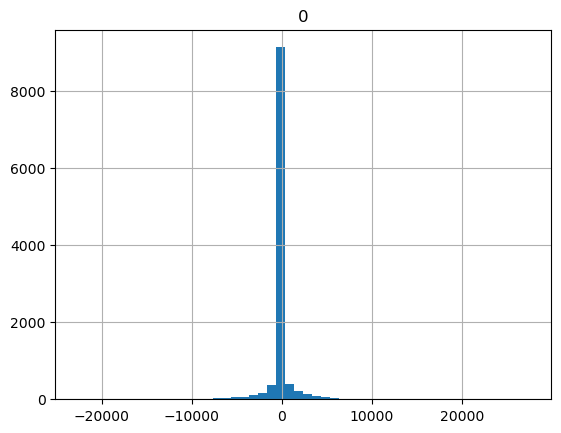

In [122]:
coefs.hist(bins=50)

In [140]:
coefs

,0
ohe__ms_subclass_30,-17747.884655
ohe__ms_subclass_40,-3550.089944
ohe__ms_subclass_45,-3351.584070
ohe__ms_subclass_60,21358.817757
ohe__ms_subclass_70,-12.591749
...,...
remainder__pid_4 remainder__fence_mat,60.337624
remainder__pid_4 remainder__fence_priv,6369.332974
remainder__fence_mat^2,-609.109782
remainder__fence_mat remainder__fence_priv,-3991.287031


In [144]:
nonzero = coefs[abs(coefs[0]) > 1]

In [145]:
nonzero

,0
ohe__ms_subclass_30,-17747.884655
ohe__ms_subclass_40,-3550.089944
ohe__ms_subclass_45,-3351.584070
ohe__ms_subclass_60,21358.817757
ohe__ms_subclass_70,-12.591749
...,...
remainder__pid_4 remainder__fence_mat,60.337624
remainder__pid_4 remainder__fence_priv,6369.332974
remainder__fence_mat^2,-609.109782
remainder__fence_mat remainder__fence_priv,-3991.287031


In [146]:
X_train_sc = X_train_sc[nonzero.index]

In [147]:
X_val_sc = X_val_sc[nonzero.index]

In [148]:
X_test_sc = X_test_sc[nonzero.index]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Columns: 11025 entries, ohe__ms_subclass_30 to remainder__fence_priv^2
dtypes: float64(11025)
memory usage: 129.4 MB


-0.000000        8074
-22691.818840       1
 409.815845         1
 401.061833         1
 401.863180         1
                 ... 
-478.958543         1
-477.865038         1
-475.638804         1
-475.299435         1
 27415.363301       1
Length: 2952, dtype: int64

In [135]:
enet = ElasticNet()
model = 'enet'
enet.fit(X_train_sc,y_train)
train = enet.score(X_train_sc,y_train)
y_pred = enet.predict(X_val_sc)
test = enet.score(X_val_sc,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

KeyboardInterrupt: 

In [190]:
from ipywidgets import *
from IPython.display import display

# The cycler package lets us "cycle" throug colors.
# Just another thing i had to look up on stackoverflow. That's my life.
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [191]:
def ridge_coefs(X_train, y_train, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    rg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        rg.set_params(alpha = a)
        
        # fit or refit the model on the provided X, Y
        rg.fit(X_train, y_train)
        
        # Get out the coefficient list
        coefs.append(rg.coef_)
        
    return coefs

In [192]:
# strengths of penalties
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train, y_train, r_alphas)

In [194]:
def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X_train.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

interactive(children=(FloatSlider(value=0.0, description='log_of_alpha', max=5.0, step=0.05), Output()), _dom_…

<function __main__.ridge_plot_runner(log_of_alpha=0)>

In [195]:
def lasso_coefs(X_train, y_train, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X_train,y_train)
        coefs.append(lasso_reg.coef_)
        
    return coefs

In [243]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    l_alphas = np.arange(100, 500, 10)
    l_coefs = lasso_coefs(X_train, y_train, l_alphas)

In [245]:
def lasso_plot_runner(alpha=0):
    coef_plotter(l_alphas, l_coefs, X_train.columns, alpha, regtype='lasso')

interact(lasso_plot_runner, alpha=(100,500,10))

interactive(children=(IntSlider(value=100, description='alpha', max=500, min=100, step=10), Output()), _dom_cl…

<function __main__.lasso_plot_runner(alpha=0)>

In [198]:
def elasticnet_coefs(X_train, y_train, alphas):
    coefs = []
    enet_reg = ElasticNet()
    for a in alphas:
        enet_reg.set_params(alpha=a, l1_ratio=0.05)
        enet_reg.fit(X_train, y_train)
        coefs.append(enet_reg.coef_)
        
    return coefs

In [199]:
enet_alphas = np.arange(0.01, 1, 0.005)
enet_coefs = elasticnet_coefs(X_train, y_train, enet_alphas)

In [200]:
def enet_plot_runner(alpha=0.01):
    coef_plotter(enet_alphas, enet_coefs, X_train.columns, alpha, regtype='elastic net')

interact(enet_plot_runner, alpha=(0.01,1.01,0.005))

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.01, min=0.01, step=0.005), Output()),…

<function __main__.enet_plot_runner(alpha=0.01)>

In [20]:
X_train.drop(columns=['remainder__1st_flr_sf','remainder__utilities',
                      'remainder__2nd_flr_sf','remainder__low_qual_fin_sf'],inplace=True)
X_val.drop(columns=['remainder__1st_flr_sf','remainder__utilities',
                      'remainder__2nd_flr_sf','remainder__low_qual_fin_sf'],inplace=True)

In [88]:
X_train.to_csv('./datasets/columns.csv')

In [37]:
train = pd.read_csv('./datasets/train.csv')

In [40]:
train['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [162]:
poly = PolynomialFeatures(
degree = 2,
include_bias=False)

In [163]:
poly.fit(X_train,y_train)

PolynomialFeatures(include_bias=False)

In [164]:
X_train = poly.transform(X_train)

In [165]:
X_val = poly.transform(X_val)

In [166]:
X_train = pd.DataFrame(data = X_train, columns = poly.get_feature_names_out())
X_val = pd.DataFrame(data = X_val, columns = poly.get_feature_names_out())

In [167]:
lr = LinearRegression()
model = 'lr'
lr.fit(X_train,y_train)
train = lr.score(X_train,y_train)
y_pred = lr.predict(X_val)
test = lr.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['lr', 1.0, -1.9105932849813172, 133682.8887691397]

In [168]:
ridge = RidgeCV()
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['ridge', 0.9975420857292421, 0.43620593126742546, 58836.29428185141]

In [169]:
lasso = Lasso()
model = 'lasso'
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

C:\Users\Ari\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.620e+09, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(


['lasso', 0.9993643984863472, -0.5898556905815355, 98801.58530001515]

In [46]:

X_train.to_csv('./datasets/X_train.csv')

KeyboardInterrupt: 

In [ ]:
X_val.to_csv('./datasets/X_val.csv')

In [ ]:
y_train.to_csv('./datasets/y_train.csv')
y_val.to_csv('./datasets/y_val.csv')

##  Step 2:  Baseline scores after Step 1

In [47]:
lr = LinearRegression()
model = 'lr'
lr.fit(X_train,y_train)


LinearRegression()

In [48]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((1538, 14027), (1538,), (513, 14027), (513,))

In [49]:
train = lr.score(X_train,y_train)
y_pred = lr.predict(X_val)
test = lr.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]

In [50]:
scores

['lr', 1.0, -5.947216559897067, 206533.4875621712]

In [51]:
ridge = RidgeCV()
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['ridge', 0.997198210893794, 0.16313307554100032, 71682.51957177215]

In [53]:
lasso = Lasso()
model = 'lasso'
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

C:\Users\Ari\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+10, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(


['lasso', 0.9992586595808142, -0.3880372658708111, 92317.83759945816]

##  Step 3 Get best columns from Lasso

In [99]:
lasso_dict = dict(zip(X_train.columns,lasso.coef_))

In [100]:
lasso_list = [key for key, value in lasso_dict.items() if abs(value) > 0.001]

In [102]:
X_train = X_train[lasso_list]
X_val = X_val[lasso_list]

In [105]:
train = lr.score(X_train,y_train)
y_pred = lr.predict(X_val)
test = lr.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]

In [106]:
scores

['lasso', 1.0, -4.491544862981642, 183625.2195814049]

In [107]:
ridge = RidgeCV()
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['ridge', 0.9971316439730465, 0.24604517575159646, 68038.96873426595]

In [108]:
lasso = Lasso()
model = 'lasso'
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

C:\Users\Ari\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+10, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(


['lasso', 0.9992601542473016, -0.3924955854089931, 92465.97931812542]

In [92]:
lasso_col = pd.DataFrame(data = lasso.coef_, columns = X_train.columns)

ValueError: Shape of passed values is (14027, 1), indices imply (14027, 14027)

In [84]:
lasso_col.head()

,0
ohe__ms_subclass_30,-14827.178854
ohe__ms_subclass_40,-3298.704821
ohe__ms_subclass_45,-2205.248557
ohe__ms_subclass_50,-14416.476614
ohe__ms_subclass_60,26548.788159


In [91]:
lasso_col[1]

KeyError: 1

In [77]:
lasso_col.value_counts()

 0.000000        10190
-19051.533112        1
 218.343154          1
 205.578579          1
 206.272280          1
                 ...  
-293.049285          1
-292.388531          1
-291.183205          1
-290.867674          1
 26548.788159        1
Length: 3838, dtype: int64

In [80]:
lasso_col = pd.DataFrame(data = lasso.coef_, columns = X_train.columns)
new_cols = [col for col in lasso_col if abs(lasso_col[col]) > 0.001]
X_train = X_train[new_cols]
X_val = X_val[new_cols]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [83]:
lasso_col.query('abs(lasso_col['0']) > 0.001')

SyntaxError: invalid syntax (103104640.py, line 1)

In [56]:
lasso.coef_

array([-14827.17885357,  -3298.70482082,  -2205.24855693, ...,
         -977.09830919,  -7548.72588989,   -996.84689661])

In [58]:
lasso.coef_.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [68]:
lasso_col = lasso_col[abs(lasso_col) > 0.01]

In [71]:
lasso_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14027 entries, ohe__ms_subclass_30 to remainder__fence_priv^2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3835 non-null   float64
dtypes: float64(1)
memory usage: 735.2+ KB


In [75]:
lasso_col.

RangeIndex(start=0, stop=1, step=1)

In [276]:
enet = ElasticNet(
alpha = 0.01,
l1_ratio=0.99)

model = 'enet'
enet.fit(X_train,y_train)
train = enet.score(X_train,y_train)
y_pred = enet.predict(X_val)
test = enet.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.018e+11, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(


['enet', 0.9018996454981228, 0.882756965498898, 26830.488838138266]

In [277]:
enet.coef_

array([ 3.97454600e+02,  1.76334341e+03,  3.30075691e+03,  6.06366156e+02,
        8.88230971e+02,  4.70304794e+03,  3.27963507e+02, -2.66083201e+01,
        1.17526955e+02,  4.02002662e+03,  1.92256128e+03,  2.39930564e+02,
        2.25027629e+03,  4.27140175e+03,  3.87273232e+03,  1.82793170e+03,
        1.48074182e+03,  6.03214511e+03,  1.11063034e+04,  1.97997461e+03,
        1.27083318e+03,  2.46857069e+03,  4.26783895e+02,  3.16366098e+03,
        8.12556650e+03,  2.20773232e+03,  6.87916191e+02,  3.13452996e+03,
        4.85949392e+02,  8.01438271e+03, -2.12876371e+03, -5.68153792e+02,
        4.95469686e+04,  1.19564523e+04,  3.70544404e+04,  2.23591374e+04,
        2.16283747e+04, -6.71867863e+01, -6.61560962e+02,  8.94603473e+02,
        9.21561738e+01,  7.54577065e+02, -2.33183655e+03, -2.16216687e+02,
       -9.92570218e+02, -4.52782273e+02, -8.93994672e+02, -9.38039753e+02,
        1.01916832e+03, -2.71876198e+03, -1.07151907e+03,  6.84825652e+02,
        4.23487535e+02, -

## Step 4:  Poly with best features

In [349]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1538, 140), (513, 140), (1538,), (513,))

In [350]:
X_train = X_train.loc[:,lasso_col]

In [352]:
X_val = X_val.loc[:,lasso_col]

In [354]:
poly = PolynomialFeatures(
degree = 2,
include_bias=False)

In [363]:
poly.fit(X_train,y_train)
X_train = poly.transform(X_train)
X_val = poly.transform(X_val)

(1538, 2210)

In [365]:
lr = LinearRegression()
model = 'lr'
lr.fit(X_train,y_train)
train = lr.score(X_train,y_train)
y_pred = lr.predict(X_val)
test = lr.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['lr', 0.9921538387155522, -8.711101944497426e+21, 7313438409358058.0]

In [366]:
ridge = RidgeCV()
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['ridge', 0.9909020843789949, 0.543709647902167, 52930.464253423765]

In [367]:
lasso = LassoCV()
model = 'lasso'
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+09, tolerance: 7.781e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.175e+08, tolerance: 8.169e+08
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.178e+09, tolerance: 8.169e+08
  model = cd_fast.enet_coo

['lasso', 0.9552825192514054, 0.832505502357755, 32068.993712219726]

In [368]:
enet = ElasticNet(
alpha = 0.01,
l1_ratio=0.99)

model = 'enet'
enet.fit(X_train,y_train)
train = enet.score(X_train,y_train)
y_pred = enet.predict(X_val)
test = enet.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.197e+10, tolerance: 9.727e+08
  model = cd_fast.enet_coordinate_descent(


['enet', 0.9939178321992128, -0.4932368568778973, 95752.34320601264]

In [123]:
alphas = [1400,1425,1450,1475,1500,1525,1550,1575,1600]
results = []
for a in alphas:
    pipe = Pipeline(
        steps = [
        ('ctx',ctx),
        ('ss',StandardScaler()),
        ('poly',poly),
        ('lasso',Lasso(alpha=a)),
    ])
    pipe.fit(X_train,y_train)
    train = pipe.score(X_train,y_train)
    test = pipe.score(X_val,y_val)
    y_pred = pipe.predict(X_val)
    mse = mean_squared_error(y_pred,y_val,squared=False)
    results.append([a,train,test,mse])

In [124]:
results

[[1400, 0.9512781589837208, 0.9203527378413868, 22114.161963670285],
 [1425, 0.950894538858513, 0.9204752956717416, 22097.141246011222],
 [1450, 0.9505109528838381, 0.9205602387342333, 22085.336735983958],
 [1475, 0.9501381730642383, 0.9206400420600506, 22074.2407422707],
 [1500, 0.9497735056038243, 0.9205284124554061, 22089.760362685596],
 [1525, 0.9494240158337535, 0.9204183988780468, 22105.044649729432],
 [1550, 0.9491025057874914, 0.9203614881285695, 22112.947166213344],
 [1575, 0.9487836238262699, 0.9203132001748817, 22119.650123940974],
 [1600, 0.9484787957456288, 0.9202831172687801, 22123.82497202926]]

In [86]:
pd.DataFrame(
    data= pipe.named_steps['lr'].coef_,
    index = pipe[1:-1].get_feature_names_out()
)

,0
x0,-20.190664
x1,-52.917506
x2,-40.790627
x3,9.399357
x4,-311.782806
...,...
x142 x143,783.258989
x142 x144,1595.167820
x143^2,342.731254
x143 x144,-130.317110
